In [1]:
from __init__ import *

from review import *
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML
%matplotlib inline
display(HTML("<style>div.output_scroll { height: 90em; }</style>"))

In [2]:
original_instruments = [
    # eur
    'EUR_USD', 'EUR_GBP', 'EUR_AUD', 'EUR_NZD', 'EUR_CAD', 'EUR_CHF', 'EUR_SGD',

    # usd 
    'GBP_USD', 'AUD_USD', 'NZD_USD', 'USD_CAD', 'USD_CHF', 'USD_SGD',

    # gbp
    'GBP_AUD', 'GBP_NZD', 'GBP_CAD', 'GBP_CHF', 'GBP_SGD',

    # aud
    'AUD_NZD', 'AUD_CAD', 'AUD_CHF', 'AUD_SGD',

    # nzd
    'NZD_CAD', 'NZD_CHF', 'NZD_SGD',

    # cad
    'CAD_CHF', 'CAD_SGD',

    # chf
    'SGD_CHF'
]

# this is good for 20211018000000
# selected_instruments = [
#     # eur
#     'EUR_USD', 'EUR_GBP', 'EUR_NZD', 'EUR_CAD', 'EUR_CHF', 'EUR_SGD',

#     # usd 
#     'GBP_USD', 'AUD_USD', 'NZD_USD', 'USD_CHF', 'USD_SGD',

#     # gbp
#     'GBP_CHF',

#     # aud
#     'AUD_NZD', 'AUD_CAD', 'AUD_CHF', 'AUD_SGD',

#     # nzd
#     'NZD_CAD', 'NZD_CHF', 'NZD_SGD',

#     # cad
#     'CAD_CHF', 'CAD_SGD',

#     # chf
#     'SGD_CHF'
# ]
selected_instruments = []
today = True
after_datetime = ctime('20211027000000') # None, ctime('20211013090000')
before_datetime = None # None, ctime('20211013220000')
selected_instrument = None # None, 'EUR_USD', ...
long_short = 'long' # None, 'long', 'short'

In [3]:
original_positions = db.read_all_positions()

def filter_positions_after_datetime(position):
    return ctime(position.datetime_close) > after_datetime
def filter_positions_before_datetime(position):
    return ctime(position.datetime_close) < before_datetime
def filter_by_instrument(position):
    return position.instrument in selected_instruments
def filter_by_long_short(position):
    return position.long_short == long_short
def filter_open_positions(position):
    return position.open
def filter_closed_positions(position):
    return not position.open
def filter_bad_trades(position):
    return position.profit_loss <= 0
def filter_good_trades(position):
    return position.profit_loss >= 0

print('# of positions accounted for = {}'.format(len(original_positions)))
positions = [position for position in filter(filter_closed_positions, original_positions)]
open_positions = [position for position in filter(filter_open_positions, original_positions)]
print("# of closed positions accounted for = {}".format(len(positions)))
print("# of open positions accounted for = {}".format(len(open_positions)))
print('\n------------------------------------------------')

if after_datetime:
    positions = [position for position in filter(filter_positions_after_datetime, positions)]
    print('\tfiltering by after {}, remaining positions: {}'.format(str(after_datetime), len(positions)))
if before_datetime or today:
    if today: before_datetime = after_datetime.add(1, 'D')
    positions = [position for position in filter(filter_positions_before_datetime, positions)]
    print('\tfiltering by before {}, remaining positions: {}'.format(str(before_datetime), len(positions)))
if len(selected_instruments) > 0:
    positions = [position for position in filter(filter_by_instrument, positions)]
    print('\tfiltering by instruments, remaining positions: {}'.format(len(positions)))
    print('Selecting {}/{} instruments'.format(len(selected_instruments), len(original_instruments)))
if long_short:
    positions = [position for position in filter(filter_by_long_short, positions)]
    print('\tfiltering by {}, remaining positions: {}'.format(long_short, len(positions)))
    
good_trades = [position for position in filter(filter_good_trades, positions)]
print('# of good trades account for = {}'.format(len(good_trades)))
bad_trades = [position for position in filter(filter_bad_trades, positions)]
print('# of bad trades accounted for = {}'.format(len(bad_trades)))

# of positions accounted for = 65
# of closed positions accounted for = 65
# of open positions accounted for = 0

------------------------------------------------
	filtering by after 20211027000000, remaining positions: 36
	filtering by before 20211028000000, remaining positions: 15
	filtering by long, remaining positions: 9
# of good trades account for = 2
# of bad trades accounted for = 7


### account balance data

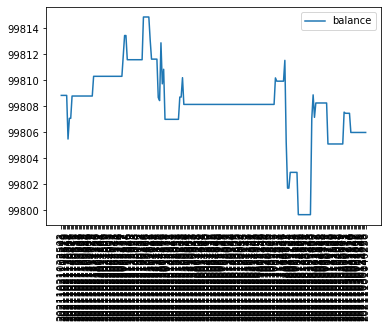

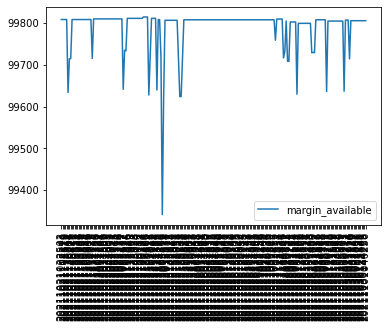

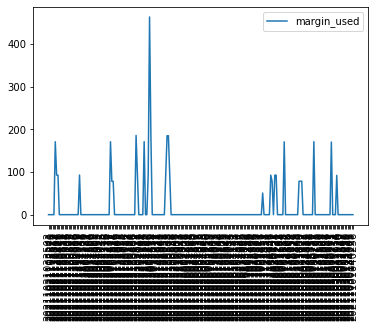

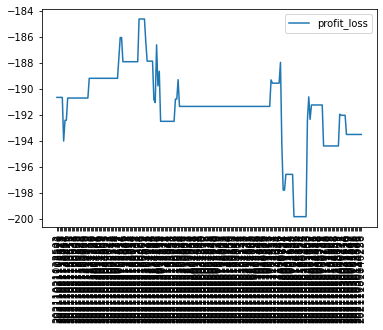

In [4]:
account_snapshots, success = db.read_all_account_snapshots()
plot_account_snapshots(account_snapshots)

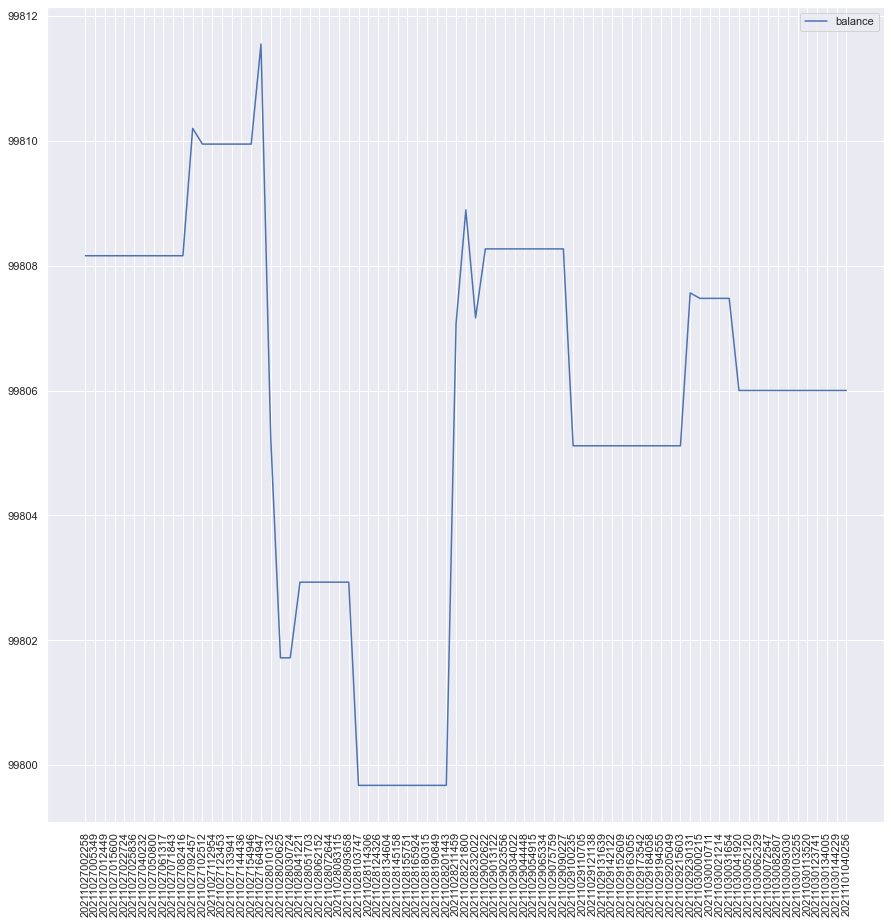

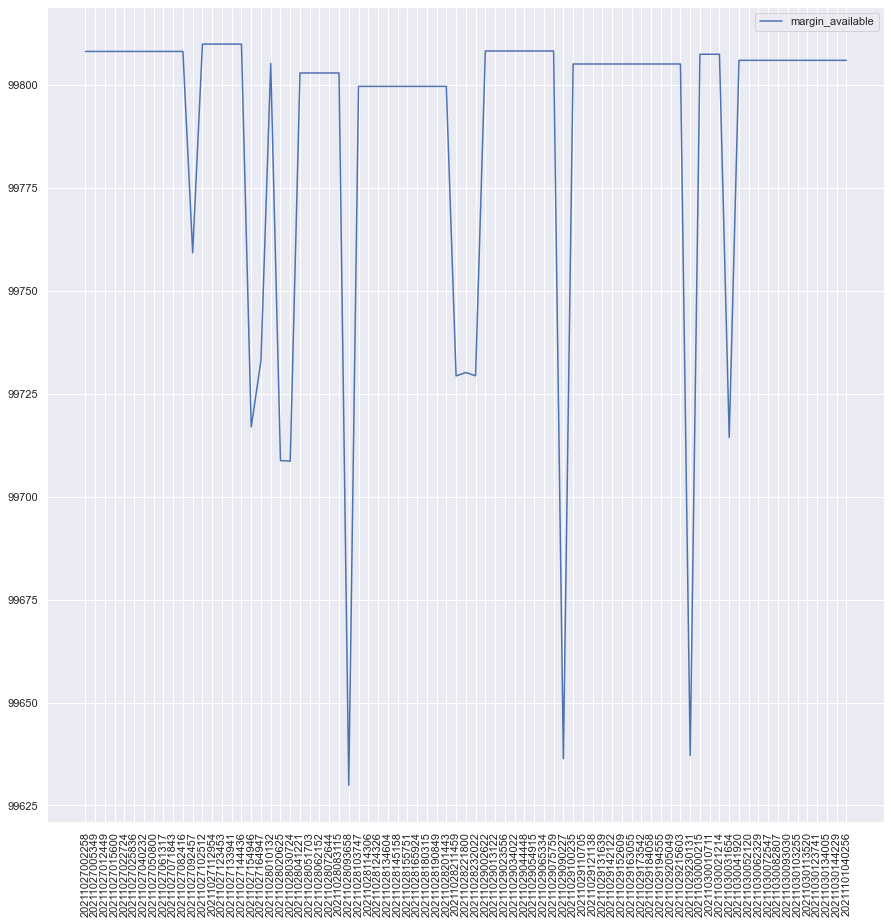

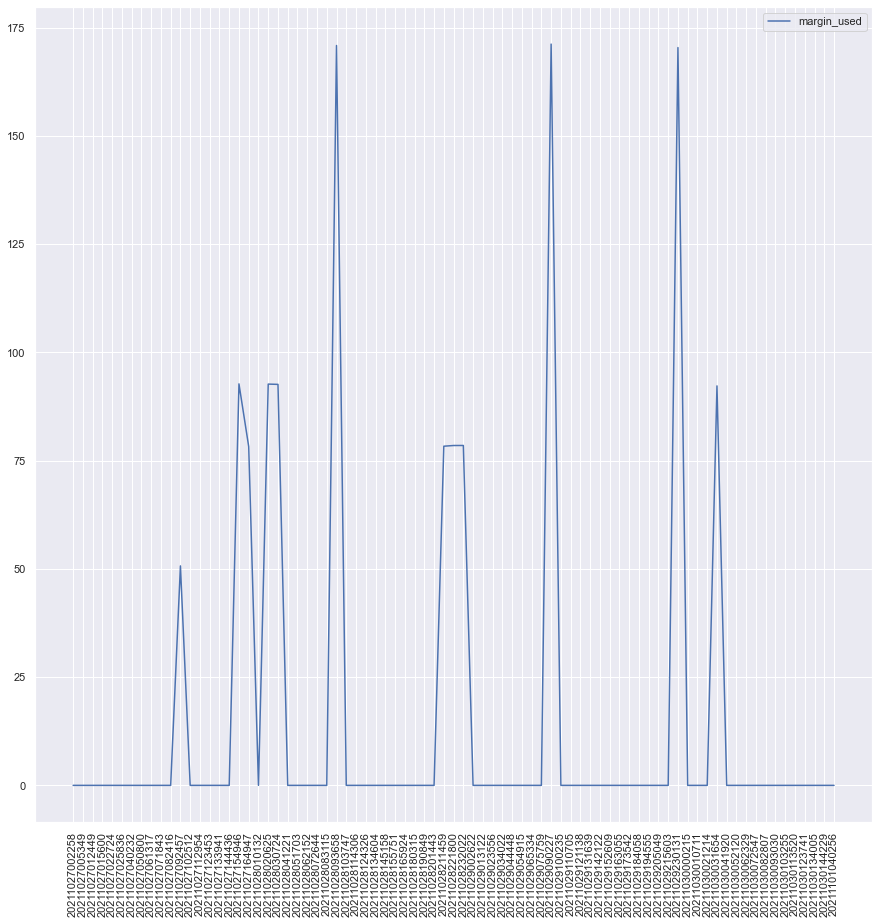

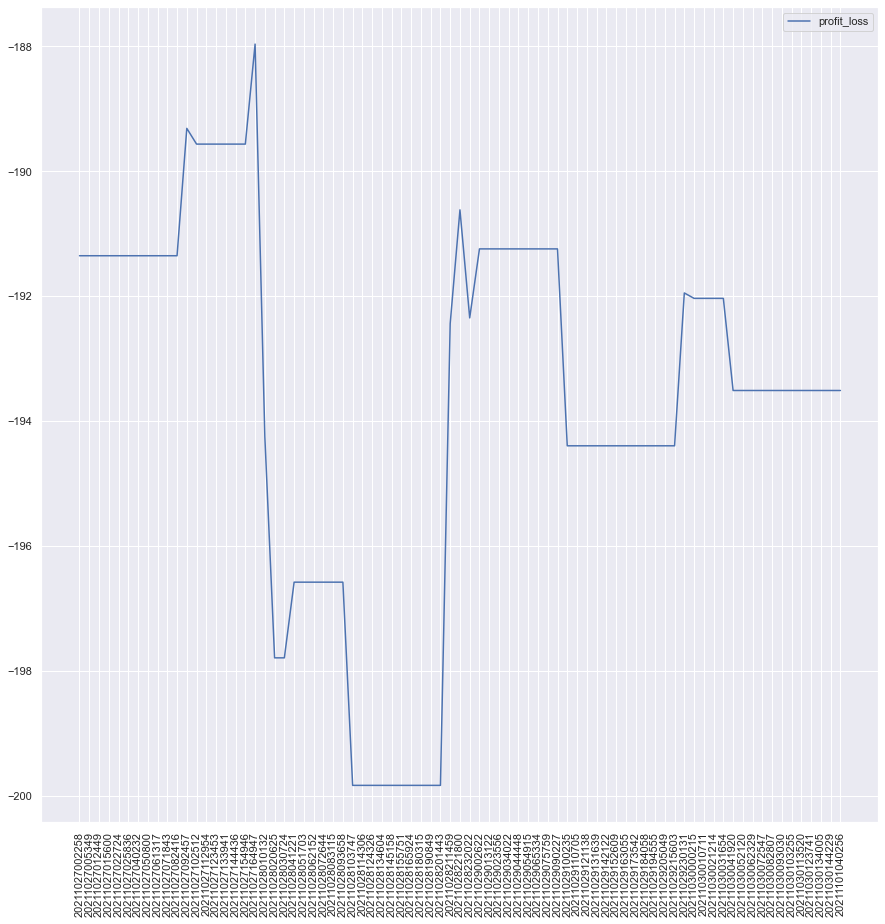

In [9]:
valid_snapshots = {}
after_datetime = ctime('20211027000000')
for dt, snapshot in account_snapshots.items():
    if ctime(dt) > after_datetime:
        valid_snapshots[dt] = snapshot
plot_account_snapshots(valid_snapshots)

### P&L 

In [6]:
sum_profit_loss(positions)

-5.659999999999554

### Instruments

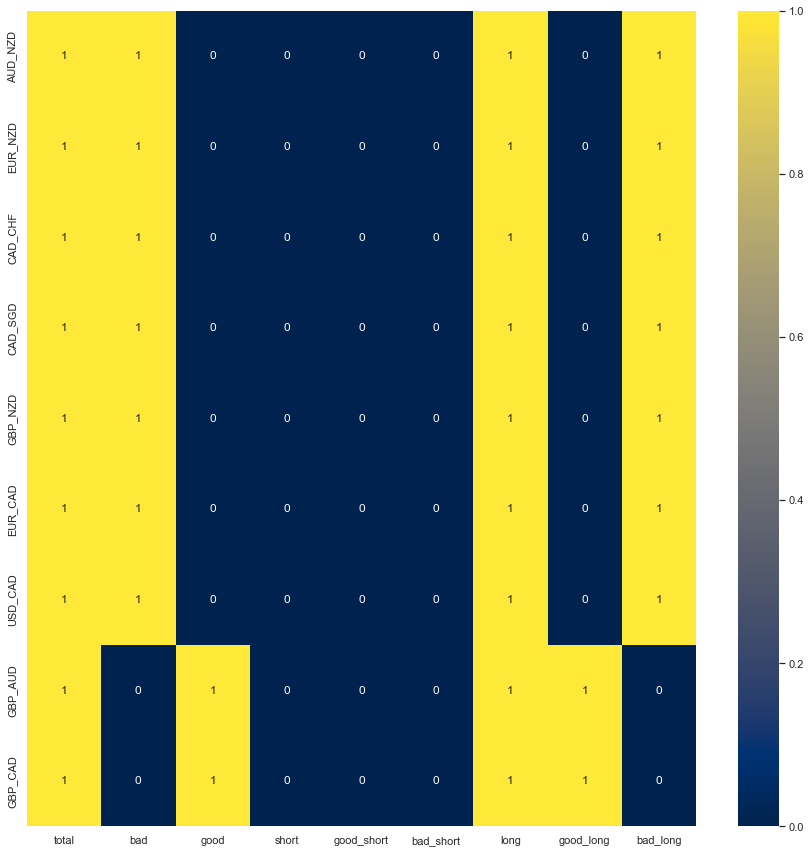

In [7]:
plot_trades_heatmap(positions, sortation=['total', 'bad', 'bad_short', 'bad_long']) 
# [ 'total', 'short', 'long', 'good', 'good_short', 'good_long', 'bad', 'bad_short', 'bad_long']

### trade analysis 

In [8]:
@interact(trade_set=widgets.Dropdown(
    options=[('bad trades', bad_trades), ('good_trades', good_trades)]),
    value=bad_trades
)
def h(trade_set):
    if len(trade_set) == 0: print('trade set empty')
    for position in trade_set:
        plot_candles_of_position(position)

interactive(children=(Dropdown(description='trade_set', options=(('bad trades', [<database.objects.Position ob…